# MadMiner debugging

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline

from madminer.goldmine import GoldMine
from madminer.tools.plots import plot_2d_morphing_basis

from delphesprocessor.delphesprocessor import DelphesProcessor

from madminer.refinery import combine_and_shuffle
from madminer.refinery import Refinery
from madminer.refinery import constant_benchmark_theta, multiple_benchmark_thetas
from madminer.refinery import constant_morphing_theta, multiple_morphing_thetas, random_morphing_thetas

from forge.forge import Forge

## Debug refinery

In [2]:
refinery = Refinery('data/madminer_example_shuffled.h5', debug=True)

10:15  
10:15  ------------------------------------------------------------
10:15  |                                                          |
10:15  |  MadMiner                                                |
10:15  |                                                          |
10:15  |  Version from July 31, 2018                              |
10:15  |                                                          |
10:15  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:15  |                                                          |
10:15  ------------------------------------------------------------
10:15  
10:15  Loading data from data/madminer_example_shuffled.h5
10:15  Found 2 parameters:
10:15     CWL2 (LHA: dim6 2, maximal power in squared ME: 2, range: (-20.0, 20.0))
10:15     CPWL2 (LHA: dim6 5, maximal power in squared ME: 2, range: (-20.0, 20.0))
10:15  Found 6 benchmarks:
10:15     sm: CWL2 = 0.00e+00, CPWL2 = 0.00e+00
10:15     w: CWL2 = 10.00, CPWL2 = 0.00e+00


In [3]:
x, theta0, theta1, y, r_xz, t_xz0 = refinery.extract_samples_train_ratio(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=constant_morphing_theta([0.,0.]),
    n_samples=10000,
    folder='./data/samples',
    filename='train_rascal'
)

10:15  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('theta', array([0., 0.]))
10:15  Total n_samples: 5000, n_benchmarks: 100, n_samples_per_theta: 50
10:15  Starting sample extraction
10:15  Augmented data requested:
10:15    ('ratio', 0, 1)
10:15    ('score', 0)
10:15  Benchmark cross sections [pb]: [0.28533414 0.2436364  0.24523069 0.31000534 0.3500099  0.31874484]
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 82.24874874 -47.29112427] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 0.9988351197397409
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [16.88786126 39.8741026 ] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.0004442774213826
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [27.64671651 1

10:15    Cumulative probability (should be close to 1): 0.9979688575450733
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-1.65053821 77.89026089] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.000803349685216
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 40.77148405 -70.6154304 ] (sampling)
10:15    theta 1 = [0. 0.]
10:15  1 negative weights (2.5745990062047836e-05)
10:15    Cumulative probability (should be close to 1): 1.0009827077421396
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 45.18715736 -93.24866581] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.0010820501103903
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ -5.43304523 -42.4854903 ] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.0004436652472377
10:15  Drawing 50 events for the 

10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 0.9987256993022466
10:15    After full pass through event files, 1 / 50 samples not found, u = [0.99963627]
10:15    Cumulative probability (should be close to 1): 0.9987256993022466
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [15.09596997 44.4635335 ] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.000535060495001
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [  46.81184728 -115.56399269] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.0011769052667276
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 8.64418961 48.20532228] (sampling)
10:15    theta 1 = [0. 0.]
10:15    Cumulative probability (should be close to 1): 1.0005913344140436
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 1.91753174 35.02880484] (samplin

10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 77.02214772 -60.26690475]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-112.06308434   29.74777862]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 74.77800465 -26.43990888]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-21.54183985 -51.51061412]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the followin

10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [46.63556275 47.88418758]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [37.50747699 84.25335985]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [59.79034897  3.49445827]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-9.46112772 61.03922167]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-26.59221806  11.2613918 ]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probabil

10:15    theta 0 = [ 40.92738254 -23.88482526]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 31.86064649 -54.74532239]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [-33.8439551   62.58141033]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15    After full pass through event files, 1 / 50 samples not found, u = [0.99985604]
10:15    Cumulative probability (should be close to 1): 0.719910328572647
10:15  Drawing 50 events for the following thetas:
10:15    theta 0 = [ 47.26399184 -51.83065276]
10:15    theta 1 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9995306992935413
10:15  Drawing 50 events for the following t

In [4]:
x, theta0, theta1, y, r_xz, t_xz0, t_xz1 = refinery.extract_samples_train_more_ratios(
    theta0=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    theta1=random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]),
    additional_thetas=[random_morphing_thetas(100, [('gaussian', 0., 50.), ('gaussian', 0., 50.)]) for _ in range(4)],
    n_samples=2000,
    folder='./data/samples',
    filename='train_multiple_rascals'
)

10:15  Extracting training sample for ratio-based methods. Numerator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)])), denominator hypothesis: ('random', (100, [('gaussian', 0.0, 50.0), ('gaussian', 0.0, 50.0)]))
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Total n_samples: 1000, n_benchmarks: 100, n_samples_per_theta: 10
10:15  Starting sample extraction
10:15  Augmented data requested:
10:15    ('ratio', 0, 1)
10:15    ('score', 0)
10:15    ('score', 1)
10:15    ('ratio', 0, 2)
10:15    ('score', 2)
10:15    ('ratio', 0, 3)
10:15    ('score', 3)
10:15    ('ratio', 0, 4)
10:15    ('score', 4)
10:15    ('ratio', 0, 5)
10:15    ('sco

10:15    Cumulative probability (should be close to 1): 1.0005182158488313
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [37.24230148 33.21664188] (sampling)
10:15    theta 1 = [-45.45128501  22.94508887]
10:15    theta 2 = [70.62368059  5.20476657]
10:15    theta 3 = [-22.38356508  22.2361277 ]
10:15    theta 4 = [-12.64122153 -10.59465487]
10:15    theta 5 = [80.863608   36.26321844]
10:15    Cumulative probability (should be close to 1): 0.7184974607284984
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [ 29.85794441 -34.26730318] (sampling)
10:15    theta 1 = [-16.13858741  40.44089565]
10:15    theta 2 = [64.60143058 34.36515484]
10:15    theta 3 = [-10.2589423   21.37193207]
10:15    theta 4 = [93.26571621 -3.87967549]
10:15    theta 5 = [52.31121211 97.26741365]
10:15    Cumulative probability (should be close to 1): 1.0007157580150627
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [ 16.73337094 -85.82387566] (

10:15    theta 4 = [-15.84316282 -71.53334207]
10:15    theta 5 = [-61.32403358 -19.46918158]
10:15    Cumulative probability (should be close to 1): 1.0004197847494372
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-34.58455358 -45.6439953 ] (sampling)
10:15    theta 1 = [-53.54073613 -35.17667701]
10:15    theta 2 = [-15.70710467  30.85662048]
10:15    theta 3 = [ 23.5423017  -18.55438693]
10:15    theta 4 = [74.73516756  8.7357385 ]
10:15    theta 5 = [ 47.76152088 -88.12136928]
10:15    Cumulative probability (should be close to 1): 0.9990231378481522
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-58.73995647  61.01771949] (sampling)
10:15    theta 1 = [ 3.90867896 60.96945559]
10:15    theta 2 = [ 40.85129972 -24.21059104]
10:15    theta 3 = [-89.29067197   0.85126878]
10:15    theta 4 = [ 56.94609241 -85.85401499]
10:15    theta 5 = [32.14283747 44.35616272]
10:15    Cumulative probability (should be close to 1): 0.9988438430957123

10:15    theta 2 = [-23.98645005  49.50287536]
10:15    theta 3 = [-29.40342997  72.79490305]
10:15    theta 4 = [ 39.1192119  -54.52410038]
10:15    theta 5 = [-6.31252608  7.64331988]
10:15    Cumulative probability (should be close to 1): 0.9970135230957857
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-26.61304358 -36.63361835] (sampling)
10:15    theta 1 = [ 27.94171394 -22.8782923 ]
10:15    theta 2 = [  8.37835849 -65.45112678]
10:15    theta 3 = [12.30642667 17.83974437]
10:15    theta 4 = [48.26320136 60.91165787]
10:15    theta 5 = [21.48010299 -5.12250607]
10:15    Cumulative probability (should be close to 1): 0.9990738422534611
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [33.35652807 40.34892417] (sampling)
10:15    theta 1 = [35.89943048 -8.49882725]
10:15    theta 2 = [ 64.40479174 -45.85957601]
10:15    theta 3 = [-31.35712903 -42.55512681]
10:15    theta 4 = [46.08525307 28.23708108]
10:15    theta 5 = [  9.91530884 -1

10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-34.73122     -6.95607929] (sampling)
10:15    theta 1 = [-4.93919523 -6.41416214]
10:15    theta 2 = [18.67680859 -7.52936076]
10:15    theta 3 = [56.91547604 45.05076593]
10:15    theta 4 = [-43.64860298   8.82777694]
10:15    theta 5 = [-23.66466516 -48.14211185]
10:15    Cumulative probability (should be close to 1): 0.9978482256179627
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-30.58381207 -40.84056851] (sampling)
10:15    theta 1 = [53.04169503 29.8888207 ]
10:15    theta 2 = [65.29727657  1.22047951]
10:15    theta 3 = [ 14.35793056 -12.01360685]
10:15    theta 4 = [-104.23346724   49.24252276]
10:15    theta 5 = [30.5311695  -0.13204518]
10:15    Cumulative probability (should be close to 1): 0.9990349106453458
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [ 18.37744606 -33.07840808] (sampling)
10:15    theta 1 = [-2.63041012  0.03995636]
10:15    theta 2 =

10:15    theta 1 = [-6.29932168 25.75305697]
10:15    theta 2 = [ -6.63913284 -33.59504862]
10:15    theta 3 = [-31.22754899 -34.19946551]
10:15    theta 4 = [-25.85998009  13.3328111 ]
10:15    theta 5 = [ 1.69076603 48.62071851]
10:15    Cumulative probability (should be close to 1): 1.0011504849654234
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-13.73818564  63.03659804] (sampling)
10:15    theta 1 = [-8.02435435 -5.13387321]
10:15    theta 2 = [ 40.32662976 -24.96495899]
10:15    theta 3 = [31.21345654 33.65683768]
10:15    theta 4 = [ 87.95280116 -63.13603848]
10:15    theta 5 = [27.28410568 29.18109087]
10:15    Cumulative probability (should be close to 1): 1.0003460177357417
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-120.38851998  -38.79427671] (sampling)
10:15    theta 1 = [23.33693263 12.67180545]
10:15    theta 2 = [-10.72189108  66.26125102]
10:15    theta 3 = [-52.75562434 -18.84766239]
10:15    theta 4 = [-73.3957524

10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-63.15689171  69.00315764]
10:15    theta 1 = [-80.6000353   31.62037635] (sampling)
10:15    theta 2 = [-33.8284721  -11.54456655]
10:15    theta 3 = [31.82638192 94.89766938]
10:15    theta 4 = [ 24.51216989 -40.57639489]
10:15    theta 5 = [-20.79021694   1.19079168]
10:15    Cumulative probability (should be close to 1): 0.9975917455005274
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [66.27047974 20.08860008]
10:15    theta 1 = [ 12.86473591 -38.99869177] (sampling)
10:15    theta 2 = [ 0.76394289 88.66757914]
10:15    theta 3 = [  7.7882341  -79.03518572]
10:15    theta 4 = [-27.23115678 -63.20783221]
10:15    theta 5 = [ 50.7174183  -79.19978373]
10:15  1 negative weights (1e-05)
10:15    Cumulative probability (should be close to 1): 1.0010572839097804
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [13.13330891 49.87063847]
10:15    theta 1 = [13.72583759 17.676

10:15    theta 4 = [-37.7734143  -29.08853777]
10:15    theta 5 = [ -5.33360261 -21.51462359]
10:15    Cumulative probability (should be close to 1): 0.9978647573013156
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-68.65239219  22.08490382]
10:15    theta 1 = [46.97313914 -3.21606284] (sampling)
10:15    theta 2 = [-15.05654714 -21.73880904]
10:15    theta 3 = [-64.29049205   5.34362477]
10:15    theta 4 = [65.05677392 -2.94727782]
10:15    theta 5 = [ 9.53456711 10.89075468]
10:15    Cumulative probability (should be close to 1): 0.9985722297395334
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-10.64318472  77.94860272]
10:15    theta 1 = [-24.34013816 -41.32300649] (sampling)
10:15    theta 2 = [  3.29305405 -25.57247399]
10:15    theta 3 = [79.50000534 22.77614559]
10:15    theta 4 = [ 65.36046932 -47.08261923]
10:15    theta 5 = [-59.89130765  36.27618554]
10:15    Cumulative probability (should be close to 1): 0.9993644389899159
1

10:15    theta 1 = [2.04277167 5.80593879] (sampling)
10:15    theta 2 = [36.16588517  1.48517456]
10:15    theta 3 = [-6.5100478  85.95467944]
10:15    theta 4 = [-43.21028438  46.79432941]
10:15    theta 5 = [40.39377105 44.7079452 ]
10:15    Cumulative probability (should be close to 1): 0.9996296159662206
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-93.70084941   1.65381363]
10:15    theta 1 = [-20.26063787  37.34143866] (sampling)
10:15    theta 2 = [ 60.68348762 -99.79973115]
10:15    theta 3 = [50.24195985 -1.23722958]
10:15    theta 4 = [-10.68147731 -50.30457869]
10:15    theta 5 = [-14.81469684  86.18608977]
10:15    Cumulative probability (should be close to 1): 0.9993853083732014
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [72.62693226 35.05188371]
10:15    theta 1 = [ 36.60029248 -23.68323791] (sampling)
10:15    theta 2 = [ -38.11682762 -129.25881679]
10:15    theta 3 = [-54.07236988 -28.94060002]
10:15    theta 4 = [35

10:15    theta 5 = [ 34.73757935 -45.44036805]
10:15    Cumulative probability (should be close to 1): 1.0001896665943866
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [36.25566587 40.24936309]
10:15    theta 1 = [-29.41825059  -8.42545302] (sampling)
10:15    theta 2 = [-39.27737652 -17.99641787]
10:15    theta 3 = [33.41700763 41.62890333]
10:15    theta 4 = [-71.74871616  80.87168998]
10:15    theta 5 = [36.0299903   3.20429089]
10:15    Cumulative probability (should be close to 1): 0.9980439892504301
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [41.28321181 26.49228912]
10:15    theta 1 = [104.05758862   9.01107566] (sampling)
10:15    theta 2 = [-46.60894029 -22.1320572 ]
10:15    theta 3 = [14.03524568 16.68273897]
10:15    theta 4 = [-51.9900644  -76.61284493]
10:15    theta 5 = [69.3539468  54.24734882]
10:15    Cumulative probability (should be close to 1): 0.9971872755591122
10:15  Drawing 10 events for the following thetas:
1

10:15    theta 2 = [ 9.63054649 -5.27836915]
10:15    theta 3 = [-11.7817117   27.45962462]
10:15    theta 4 = [-71.3745883  -12.91441648]
10:15    theta 5 = [-19.76785781 -18.91233859]
10:15    Cumulative probability (should be close to 1): 0.9973621114843099
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-75.3348803   56.71624245]
10:15    theta 1 = [ 23.01485874 -28.93658379] (sampling)
10:15    theta 2 = [-85.62957707  55.67235595]
10:15    theta 3 = [-58.10036951  50.21049771]
10:15    theta 4 = [ 59.25318457 -52.96556871]
10:15    theta 5 = [-32.10329796 -27.77616086]
10:15    Cumulative probability (should be close to 1): 1.000813094784329
10:15  Drawing 10 events for the following thetas:
10:15    theta 0 = [-9.24930495 23.30135038]
10:15    theta 1 = [ 39.37015916 -13.07875942] (sampling)
10:15    theta 2 = [-40.36305558 -62.23763542]
10:15    theta 3 = [-65.96327412  73.88030888]
10:15    theta 4 = [-50.48448336 -56.30359021]
10:15    theta 5 = [91.175

In [5]:
x, theta = refinery.extract_samples_test(
    theta=constant_benchmark_theta('sm'),
    n_samples=10000,
    folder='./data/samples',
    filename='test'
)

x_bsm, theta_bsm = refinery.extract_samples_test(
    theta=constant_morphing_theta([50.,0.]),
    n_samples=10000,
    folder='./data/samples',
    filename='test_bsm'
)

10:15  Extracting evaluation sample. Sampling according to ('benchmark', 'sm')
10:15  Starting sample extraction
10:15  Augmented data requested:
10:15  Benchmark cross sections [pb]: [0.12227106 0.10380875 0.10156061 0.12945291 0.14868256 0.13626371]
10:15  Drawing 10000 events for the following thetas:
10:15    theta 0 = [0. 0.] (sampling)
10:15    Cumulative probability (should be close to 1): 0.9996317125166997
10:15    After full pass through event files, 5 / 10000 samples not found, u = [0.99979168 0.99988796 0.99975139 0.99989852 0.99976433]
10:15    Cumulative probability (should be close to 1): 0.9996317125166997
10:15  Extracting evaluation sample. Sampling according to ('theta', array([50.,  0.]))
10:15  Starting sample extraction
10:15  Augmented data requested:
10:15  Benchmark cross sections [pb]: [0.12227106 0.10380875 0.10156061 0.12945291 0.14868256 0.13626371]
10:15  Drawing 10000 events for the following thetas:
10:15    theta 0 = [50.  0.] (sampling)
10:15    Cumula

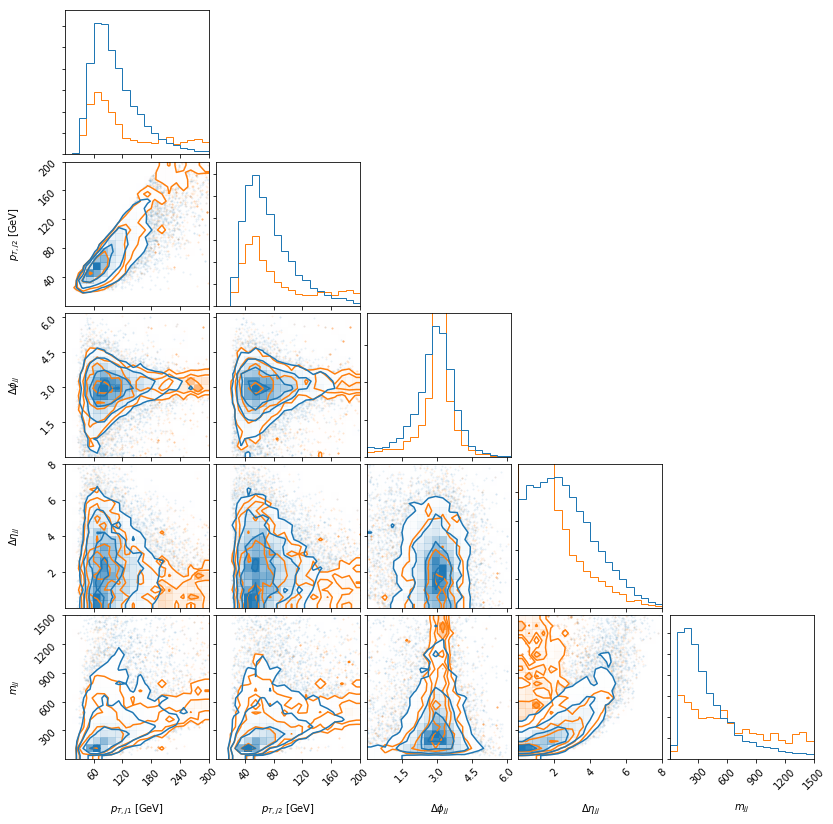

In [6]:
import corner

labels = [r'$p_{T,j1}$ [GeV]', r'$p_{T,j2}$ [GeV]', r'$\Delta \phi_{jj}$', r'$\Delta \eta_{jj}$', r'$m_{jj}$']
ranges = [(0., 300.), (0., 200.), (0.,6.2), (0.,8.), (0.,1500.)]

fig = corner.corner(x_bsm, color='C1', labels=labels, range=ranges)
_ = corner.corner(x, color='C0', labels=labels, range=ranges, fig=fig)

## Debug Forge

In [7]:
forge = Forge(debug=True)

10:15  
10:15  ------------------------------------------------------------
10:15  |                                                          |
10:15  |  Forge                                                   |
10:15  |                                                          |
10:15  |  Version from July 31, 2018                              |
10:15  |                                                          |
10:15  |           Johann Brehmer, Kyle Cranmer, and Felix Kling  |
10:15  |                                                          |
10:15  ------------------------------------------------------------
10:15  


In [8]:
forge.train(
    method='carl',
    theta0_filename='data/samples/theta0_train_rascal.npy',
    x_filename='data/samples/x_train_rascal.npy',
    y_filename='data/samples/y_train_rascal.npy',
    alpha=100.,
    n_epochs=1,
    validation_split=0.3
)

forge.save('models/carl')

10:16  Starting training
10:16    Method:                 carl
10:16    Training data: theta0 at data/samples/theta0_train_rascal.npy
10:16                   x at data/samples/x_train_rascal.npy
10:16                   y at data/samples/y_train_rascal.npy
10:16    Method:                 carl
10:16    Hidden layers:          (100, 100, 100)
10:16    Activation function:    tanh
10:16    alpha:                  100.0
10:16    Batch size:             64
10:16    Epochs:                 1
10:16    Learning rate:          0.001 initially, decaying to 0.0001
10:16    Early stopping:         True
10:16  Loading training data
10:16  Found 10000 samples with 2 parameters and 5 observables
10:16  Creating model for method carl
10:16  Training model
10:16    Epoch 1: train loss 0.63 ([0.62609594]), validation loss 0.60 ([0.601733])
10:16  Finished training
10:16  Saving settings to models/carl_settings.json
10:16  Saving state dictionary to models/carl_state_dict.pt


In [9]:
forge.train(
    method='alice',
    theta0_filename='data/samples/theta0_train_rascal.npy',
    x_filename='data/samples/x_train_rascal.npy',
    y_filename='data/samples/y_train_rascal.npy',
    r_xz_filename='data/samples/r_xz_train_rascal.npy',
    alpha=100.,
    n_epochs=1,
    validation_split=0.3
)

forge.save('models/alice')

10:16  Starting training
10:16    Method:                 alice
10:16    Training data: theta0 at data/samples/theta0_train_rascal.npy
10:16                   x at data/samples/x_train_rascal.npy
10:16                   y at data/samples/y_train_rascal.npy
10:16                   r_xz at data/samples/r_xz_train_rascal.npy
10:16    Method:                 alice
10:16    Hidden layers:          (100, 100, 100)
10:16    Activation function:    tanh
10:16    alpha:                  100.0
10:16    Batch size:             64
10:16    Epochs:                 1
10:16    Learning rate:          0.001 initially, decaying to 0.0001
10:16    Early stopping:         True
10:16  Loading training data
10:16  Found 10000 samples with 2 parameters and 5 observables
10:16  Creating model for method alice
10:16  Training model
10:16    Epoch 1: train loss 0.62 ([0.61623995]), validation loss 0.60 ([0.59801885])
10:16  Finished training
10:16  Saving settings to models/alice_settings.json
10:16  Saving st

In [10]:
forge.train(
    method='rascal2',
    theta0_filename='data/samples/theta0_train_multiple_rascals.npy',
    theta1_filename='data/samples/theta1_train_multiple_rascals.npy',
    x_filename='data/samples/x_train_multiple_rascals.npy',
    y_filename='data/samples/y_train_multiple_rascals.npy',
    r_xz_filename='data/samples/r_xz_train_multiple_rascals.npy',
    t_xz0_filename='data/samples/t_xz0_train_multiple_rascals.npy',
    t_xz1_filename='data/samples/t_xz1_train_multiple_rascals.npy',
    alpha=100.,
    n_epochs=1,
    validation_split=0.3
)

forge.save('models/rascal2')

10:16  Starting training
10:16    Method:                 rascal2
10:16    Training data: theta0 at data/samples/theta0_train_multiple_rascals.npy
10:16                   theta1 at data/samples/theta1_train_multiple_rascals.npy
10:16                   x at data/samples/x_train_multiple_rascals.npy
10:16                   y at data/samples/y_train_multiple_rascals.npy
10:16                   r_xz at data/samples/r_xz_train_multiple_rascals.npy
10:16                   t_xz (theta0) at  data/samples/t_xz0_train_multiple_rascals.npy
10:16                   t_xz (theta1) at  data/samples/t_xz1_train_multiple_rascals.npy
10:16    Method:                 rascal2
10:16    Hidden layers:          (100, 100, 100)
10:16    Activation function:    tanh
10:16    alpha:                  100.0
10:16    Batch size:             64
10:16    Epochs:                 1
10:16    Learning rate:          0.001 initially, decaying to 0.0001
10:16    Early stopping:         True
10:16  Loading training data
10:

In [11]:
theta_each = np.linspace(-100.,100.,21)
theta0, theta1 = np.meshgrid(theta_each, theta_each)
theta_grid = np.vstack((theta0.flatten(), theta1.flatten())).T
np.save('data/theta_grid.npy', theta_grid)

theta_denom = np.array([[0.,0.]])
np.save('data/theta_ref.npy', theta_denom)


In [25]:
forge.load('models/alice')

log_r_hat_train, _, _ = forge.evaluate(
    theta0_filename='data/samples/theta0_train_rascal.npy',
    x_filename='data/samples/x_train_rascal.npy',
    test_all_combinations=False
)

log_r_hat_test, _, _ = forge.evaluate(
    theta0_filename='data/theta_grid.npy',
    theta1_filename='data/theta_ref.npy',
    x_filename='data/samples/x_test.npy',
)

10:25  Loading settings from models/alice_settings.json
10:25  Loading state dictionary from models/alice_state_dict.pt
10:25  Starting evaluation
10:25  Loading training data
10:25  Starting evaluation
10:25  Starting evaluation
10:25  Loading training data
10:25  Starting evaluation for thetas 1 / 441: [-100. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 2 / 441: [ -90. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 3 / 441: [ -80. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 4 / 441: [ -70. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 5 / 441: [ -60. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 6 / 441: [ -50. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 7 / 441: [ -40. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 8 / 441: [ -30. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 9 / 441: [ -20. -100.] vs [0. 0.]
10:25  Starting evaluation for thetas 10 / 441: [ -10. -100.] vs [0. 0.]
10:25  Starting eval

10:26  Starting evaluation for thetas 112 / 441: [-40. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 113 / 441: [-30. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 114 / 441: [-20. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 115 / 441: [-10. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 116 / 441: [  0. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 117 / 441: [ 10. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 118 / 441: [ 20. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 119 / 441: [ 30. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 120 / 441: [ 40. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 121 / 441: [ 50. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 122 / 441: [ 60. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 123 / 441: [ 70. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 124 / 441: [ 80. -50.] vs [0. 0.]
10:26  Starting evaluation for thetas 125 / 441: [ 90. -50.] vs 

10:26  Starting evaluation for thetas 226 / 441: [50.  0.] vs [0. 0.]
10:26  Starting evaluation for thetas 227 / 441: [60.  0.] vs [0. 0.]
10:26  Starting evaluation for thetas 228 / 441: [70.  0.] vs [0. 0.]
10:26  Starting evaluation for thetas 229 / 441: [80.  0.] vs [0. 0.]
10:26  Starting evaluation for thetas 230 / 441: [90.  0.] vs [0. 0.]
10:26  Starting evaluation for thetas 231 / 441: [100.   0.] vs [0. 0.]
10:26  Starting evaluation for thetas 232 / 441: [-100.   10.] vs [0. 0.]
10:26  Starting evaluation for thetas 233 / 441: [-90.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 234 / 441: [-80.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 235 / 441: [-70.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 236 / 441: [-60.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 237 / 441: [-50.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 238 / 441: [-40.  10.] vs [0. 0.]
10:26  Starting evaluation for thetas 239 / 441: [-30.  10.] vs [0. 0.]


10:27  Starting evaluation for thetas 342 / 441: [-50.  60.] vs [0. 0.]
10:27  Starting evaluation for thetas 343 / 441: [-40.  60.] vs [0. 0.]
10:27  Starting evaluation for thetas 344 / 441: [-30.  60.] vs [0. 0.]
10:27  Starting evaluation for thetas 345 / 441: [-20.  60.] vs [0. 0.]
10:27  Starting evaluation for thetas 346 / 441: [-10.  60.] vs [0. 0.]
10:27  Starting evaluation for thetas 347 / 441: [ 0. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 348 / 441: [10. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 349 / 441: [20. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 350 / 441: [30. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 351 / 441: [40. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 352 / 441: [50. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 353 / 441: [60. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 354 / 441: [70. 60.] vs [0. 0.]
10:27  Starting evaluation for thetas 355 / 441: [80. 60.] vs [0. 0.]
10:27  Sta

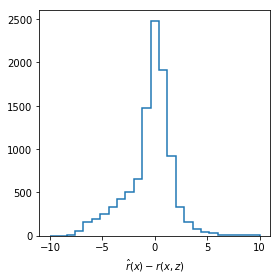

In [28]:
log_r_xz = np.log(np.load('data/samples/r_xz_train_rascal.npy'))

fig = plt.figure(figsize=(4,4))

plt.hist(log_r_hat_train.flatten() - log_r_xz.flatten(), histtype='step', range=(-10.,10.), bins=25, color='C0', lw=1.5)

plt.xlabel(r'$\hat{r}(x) - r(x,z)$')
plt.tight_layout()
plt.show()

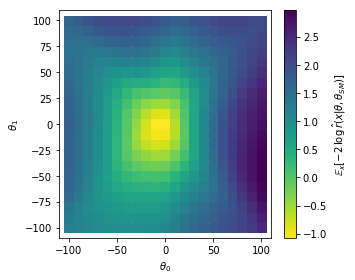

Best fit: [-10.   0.]


In [29]:
expected_llr = np.mean(log_r_hat_test, axis=1)

fig = plt.figure(figsize=(5,4))

sc = plt.scatter(theta_grid[:,0], theta_grid[:,1], c=-2.*expected_llr,
            s=90., cmap='viridis_r',
            marker='s')
cb = plt.colorbar(sc)

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
cb.set_label(r'$\mathbb{E}_x [ -2\, \log \,\hat{r}(x | \theta, \theta_{SM}) ]$')

plt.tight_layout()
plt.show()

print('Best fit:', theta_grid[np.argmin(-2.*expected_llr)])